In [1]:
!pip install tensorflow opencv-python matplotlib

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


In [4]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [5]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("garbage_data")  # Extract to a new folder named "garbage_data"


In [6]:
import os
os.listdir("garbage_data")


['TrashType_Image_Dataset']

In [7]:
os.listdir("garbage_data/TrashType_Image_Dataset")



['cardboard', 'glass', 'plastic', 'trash', 'metal', 'paper']

In [8]:
import cv2
data = []
IMG_SIZE = 128  # Resize all images to 128x128
data_path = "garbage_data/TrashType_Image_Dataset"
categories = os.listdir(data_path)

for category in categories:
    folder_path = os.path.join(data_path, category)
    label = categories.index(category)

    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([img_array, label])
        except Exception as e:
            pass


In [9]:
import random
random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X) / 255.0  # Normalize pixel values to range [0, 1]
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir("garbage_data/TrashType_Image_Dataset")), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 791ms/step - accuracy: 0.8709 - loss: 0.3764 - val_accuracy: 0.5810 - val_loss: 1.3909
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 810ms/step - accuracy: 0.8937 - loss: 0.3165 - val_accuracy: 0.6047 - val_loss: 1.3944
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 79s 763ms/step - accuracy: 0.9077 - loss: 0.2945 - val_accuracy: 0.5771 - val_loss: 1.7657
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 809ms/step - accuracy: 0.9196 - loss: 0.2398 - val_accuracy: 0.5534 - val_loss: 1.9156
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 789ms/step - accuracy: 0.9219 - loss: 0.2492 - val_accuracy: 0.5929 - val_loss: 1.6418
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 802ms/step - accuracy: 0.9304 - loss: 0.2368 - val_accuracy: 0.5751 - val_loss: 1.8219
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 809ms/step - accuracy: 0.9420 - loss: 0.1783 - val_accuracy: 0.6107 - val_loss: 1.6712
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 795ms/step - accuracy: 0.9416 - loss: 0.2022 - val_accu

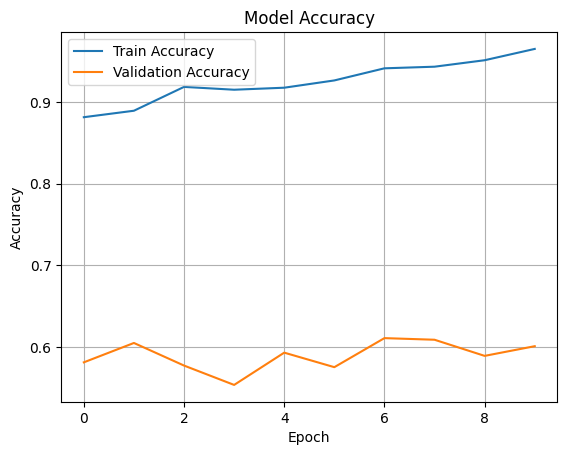

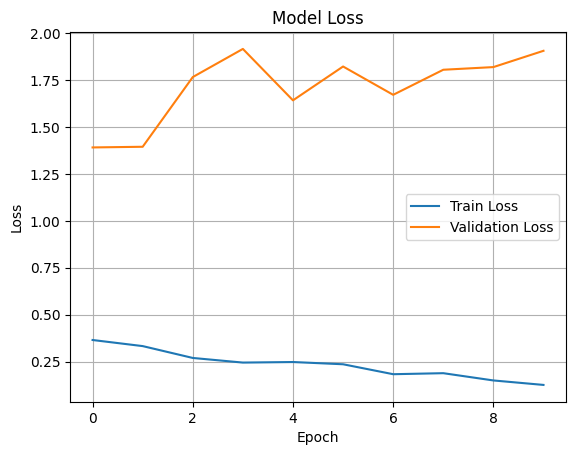

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [15]:
from google.colab import files
uploaded = files.upload()


Saving ref.jpg to ref.jpg


In [17]:
categories = os.listdir("garbage_data/TrashType_Image_Dataset")



In [18]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Class: {categories[class_index]}")
    print(f"Confidence: {confidence:.2f}")


In [19]:
predict_image("ref.jpg")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Class: paper
Confidence: 0.96


In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


In [21]:
base_model = MobileNetV2(
    weights='imagenet',       # Load pretrained weights
    include_top=False,        # Exclude the top classification layer
    input_shape=(128, 128, 3) # Your input image size
)

base_model.trainable = False  # Freeze the base model so we don’t re-train it


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 garbage classes

model = Model(inputs=base_model.input, outputs=predictions)


In [23]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Optional: to see the model structure


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [25]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=15,
                    validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 666ms/step - accuracy: 0.4461 - loss: 1.5628 - val_accuracy: 0.7352 - val_loss: 0.7649
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 629ms/step - accuracy: 0.6737 - loss: 0.8719 - val_accuracy: 0.7628 - val_loss: 0.6598
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 621ms/step - accuracy: 0.7059 - loss: 0.7711 - val_accuracy: 0.8024 - val_loss: 0.5917
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 622ms/step - accuracy: 0.7487 - loss: 0.6703 - val_accuracy: 0.7688 - val_loss: 0.6545
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 559ms/step - accuracy: 0.7756 - loss: 0.6147 - val_accuracy: 0.7925 - val_loss: 0.5956
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 622ms/step - accuracy: 0.7946 - loss: 0.5661 - val_accuracy: 0.7925 - val_loss: 0.5582
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 564ms/step - accuracy: 0.7975 - loss: 0.5107 - val_accuracy: 0.8202 - val_loss: 0.5440
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 626ms/step - accuracy: 0.8253 - loss: 0.4916 - val_accu

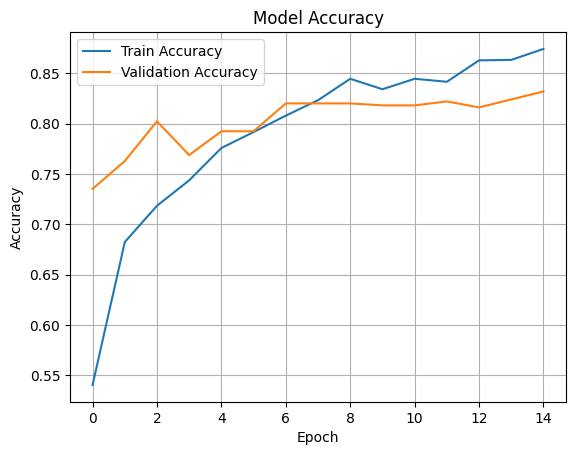

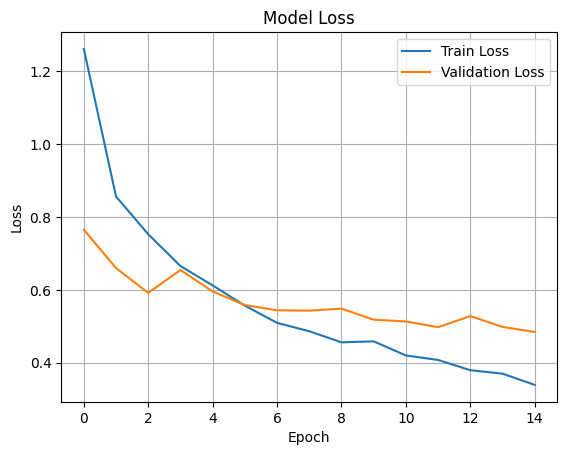

In [26]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Class: {categories[class_index]}")
    print(f"Confidence: {confidence:.2f}")


In [28]:
predict_image("ref.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: plastic
Confidence: 0.68


In [29]:
model.save("garbage_classifier_transfer.h5")

# To download locally
from google.colab import files
files.download("garbage_classifier_transfer.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>